In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [ ]:
@staticmethod
def factor(df):
    '''衡量 candle body 相对 range 的大小
    衡量K线实体的相对大小，反映价格走势的强弱（如强趋势或市场犹豫）。
    '''
    body = abs(df['close'] - df['open'])
    range_ = df['high'] - df['low']
    body_to_range_ratio = body / range_
    return body_to_range_ratio

# 测试因子表现


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.003802
   Rank_IC (Spearman): 0.005926
📊 信息比率:
   IR: 0.261972
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 131032
   因子列: factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


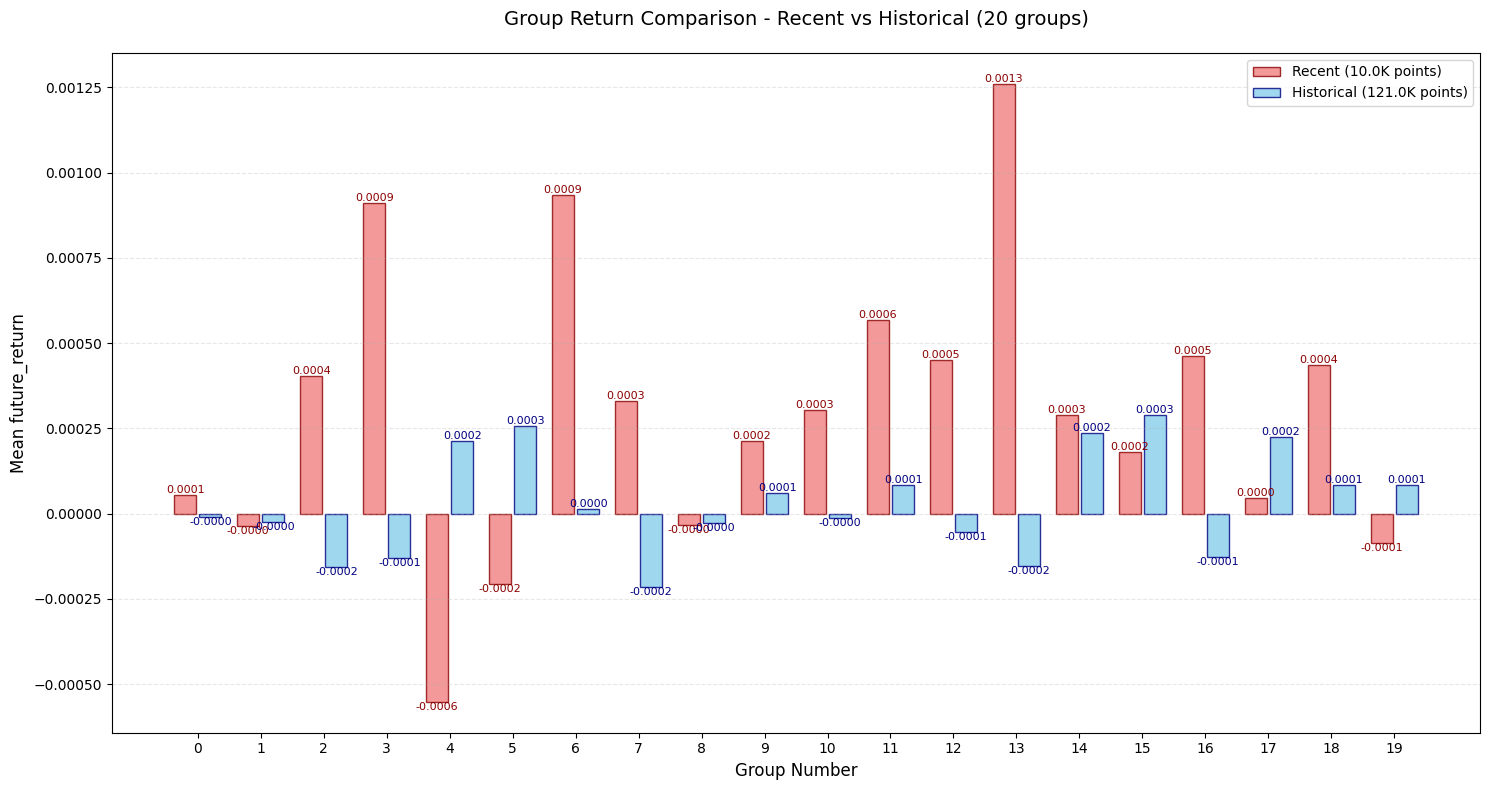

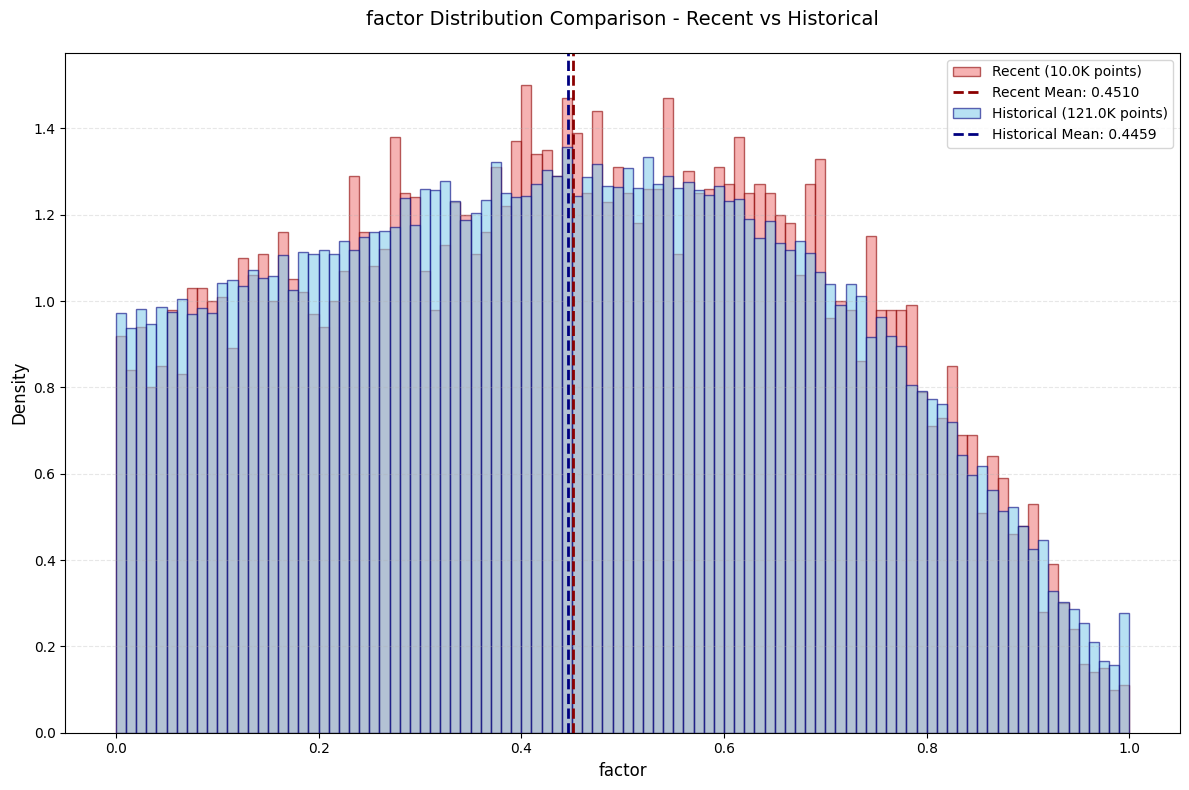

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [5]:
evaluator.set_factor(
    factor_func=factor,
    factor_name='factor'
)

result=evaluator.run_full_evaluation(run_stationarity_test=False)

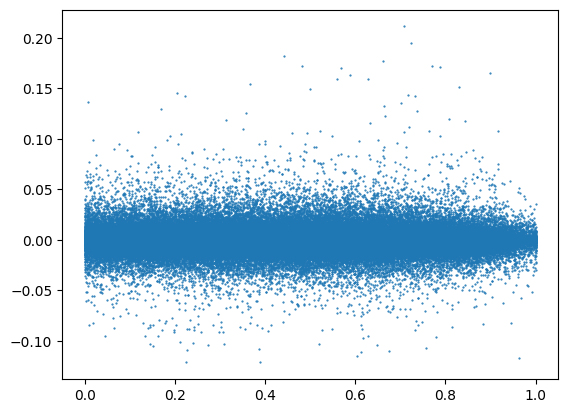

In [6]:
import matplotlib.pyplot as plt
plt.scatter(factor(df),df['close'].pct_change(-10), s=0.3)

In [7]:
result['information_ratio']['group_correlations']
# 这表示不同分组之间的相关性，通常用于评估因子在不同市场状态下的表现一致性。
# 如果相关性较高，说明因子在不同市场状态下表现一致；如果相关性较低，说明因子在不同市场状态下表现差异较大。

[0.0016671309523703824,
 0.007222152970372815,
 0.001914636688535379,
 -0.012546815049627093,
 0.0008601832959944081,
 0.004443967554754812,
 -0.0058765699623044305,
 0.00021548525182418435,
 0.013313958743123477,
 0.006547484144747471]

In [8]:
print(result)

{'correlation_analysis': {'IC': 0.0038022399239343364, 'Rank_IC': 0.005926055387603201}, 'information_ratio': {'IR': 0.2619718442669093, 'group_correlations': [0.0016671309523703824, 0.007222152970372815, 0.001914636688535379, -0.012546815049627093, 0.0008601832959944081, 0.004443967554754812, -0.0058765699623044305, 0.00021548525182418435, 0.013313958743123477, 0.006547484144747471], 'n_groups': 10}, 'group_analysis': {'group_stats':        val_min  val_max  val_mean  return_mean  return_std  count
group                                                            
0       0.0000   0.0524    0.0262      -0.0000      0.0116   6552
1       0.0524   0.1031    0.0776      -0.0000      0.0111   6552
2       0.1031   0.1505    0.1270      -0.0001      0.0117   6551
3       0.1506   0.1969    0.1739      -0.0000      0.0116   6552
4       0.1969   0.2417    0.2195       0.0002      0.0122   6551
5       0.2417   0.2845    0.2634       0.0002      0.0117   6552
6       0.2845   0.3252    0.3050